# Importing Libraries

In [120]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.1)


In [121]:
!pip install chart_studio
import chart_studio.plotly as py

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as ch
import plotly.graph_objs as pg
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kidney Disease Prediction/kidney_disease.csv')

In [125]:
data1

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


# Data Visualization

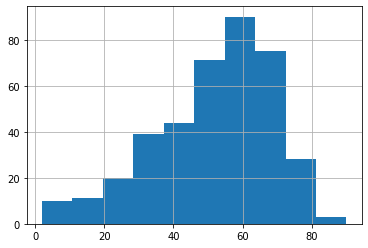

In [126]:
data1['age'].hist(bins=10)

In [127]:
data1.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

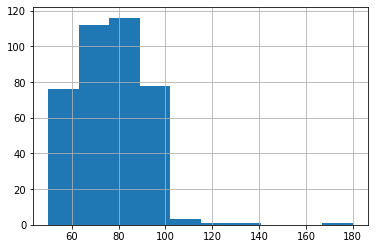

In [128]:
data1['bp'].hist(bins=10)

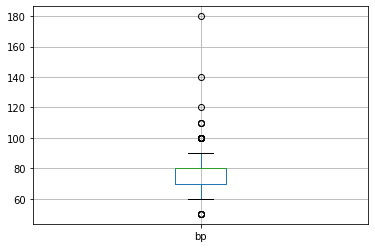

In [129]:
data1.boxplot(column='bp')

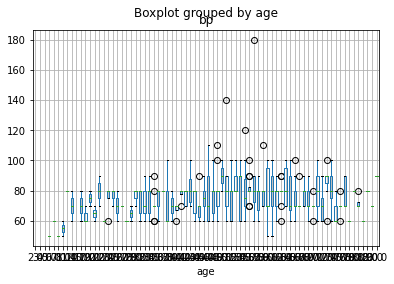

In [130]:
data1.boxplot(column='bp',by='age')

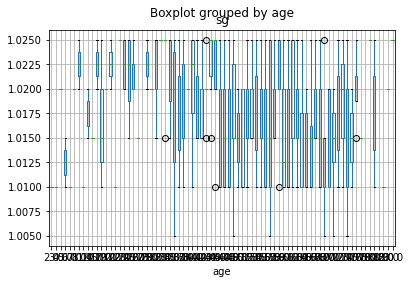

In [131]:
data1.boxplot(column='sg',by='age')

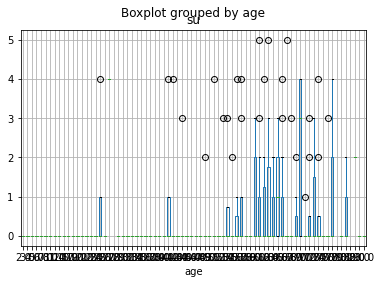

In [132]:
data1.boxplot(column='su',by='age')

In [133]:
pd.crosstab(data1['bp'],data1['classification'],margins=True)

classification,ckd,ckd\t,notckd,All
bp,,,,
50.0,5,0,0,5
60.0,25,1,45,71
70.0,74,0,38,112
80.0,50,1,65,116
90.0,53,0,0,53
100.0,25,0,0,25
110.0,3,0,0,3
120.0,1,0,0,1
140.0,1,0,0,1


In [0]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot,init_notebook_mode

In [135]:
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [136]:
data1[['age','bp']].iplot()

In [137]:
data1[['age','bp']].iplot(kind='scatter',mode='markers')

In [138]:
data1[['age','su']].iplot(kind='scatter',mode='markers')

In [139]:
data1[['age','wc']].iplot(kind='scatter',mode='markers')

In [140]:
data1.iplot(kind='bar',x='age',y='bp')

In [141]:
data1.iplot(kind='bar',x='age',y='su')

In [142]:
data1.iplot(kind='bar',x='age',y='al')

In [143]:
data1['age'].iplot(kind='hist',xTitle='age',yTitle='count',title='Age Distribution')

In [144]:
data1.iplot(kind='bar',x='age',y='classification')

In [145]:
data1.iplot(kind='bar',x='bp',y='classification')

In [146]:
data1.iplot(kind='bar',x='rc',y='classification')

In [147]:
data1.iplot(kind='bar',x='wc',y='classification')

In [148]:
data1.iplot(kind='bar',x='sg',y='classification')

In [149]:
data1[['age','bp']].iplot(kind="surface",colorscale='blues')

In [150]:
data1[['age','su']].iplot(kind="surface",colorscale='blues')

In [151]:
data1[['age','sg']].iplot(kind="surface",colorscale='blues')

In [152]:
data1[['age','bp']].iplot(
kind='hist',
histnorm='percent',
xTitle='age',
yTitle='bp',
title='Bp by age')

In [153]:
data1[['age','su']].iplot(
kind='hist',
histnorm='percent',
xTitle='age',
yTitle='su',
title='sugar by age')

In [154]:
data1.iplot(
x='age',
y='bp',
categories='classification',
xTitle='age',
yTitle='bp')

In [155]:
import plotly.express as px
fig=px.scatter_matrix(data1)
fig.show()

In [156]:
fig=px.scatter_matrix(data1,
                     dimensions=["age","bp","su","ane","classification"],
                     color="classification")
fig.show()

In [157]:
data1.shape

(400, 26)

In [158]:
#Since Id is Not Required it is Dropped from the data
data1=data1.drop(['id'],axis=1)
data1.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


# Taking care of Missing values & Label encoding

In [159]:
data1.isnull().any()

age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [160]:
data1.apply(lambda x:sum(x.isnull()),axis=0)

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [0]:
#The Categorical Values in the Dataset are converted into Numerical Values For Better Representation of the Data

data1['rbc'].fillna('normal',inplace = True)
data1['rbc'].replace(['normal','abnormal'],[0,1],inplace = True)

data1['pc'].fillna('normal',inplace = True)
data1['pc'].replace(['normal','abnormal'],[0,1],inplace = True)

data1['pcc'].fillna('notpresent',inplace = True)
data1['pcc'].replace(['notpresent','present'],[0,1],inplace = True)

data1['ba'].fillna('notpresent',inplace = True)
data1['ba'].replace(['notpresent','present'],[0,1],inplace = True)

data1['htn'].fillna('no',inplace = True)
data1['htn'].replace(['no','yes'],[0,1],inplace = True)

data1['dm'].fillna('no',inplace = True)
#Replacing '\tno','\tyes',' yes' with 'no','yes','yes'
data1['dm'].replace(['\tno','\tyes',' yes'],['no','yes','yes'],inplace = True)
data1['dm'].replace(['no','yes'],[0,1],inplace = True)

data1['appet'].fillna('good',inplace = True)
data1['appet'].replace(['good','poor'],[0,1],inplace = True)

data1['pe'].fillna('no',inplace = True)
data1['pe'].replace(['no','yes'],[0,1],inplace = True)

data1['ane'].fillna('no',inplace = True)
data1['ane'].replace(['no','yes'],[0,1],inplace = True)

In [162]:
data1.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1,1,no,0,0,0,ckd
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0,0,no,0,0,0,ckd
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0,1,no,1,0,1,ckd
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1,0,no,1,1,1,ckd
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0,0,no,0,0,0,ckd


In [163]:
data1['rbc'].value_counts()

data1['pc'].value_counts()

data1['pcc'].value_counts()

data1['ba'].value_counts()

data1['htn'].value_counts()

data1['dm'].value_counts()

data1['appet'].value_counts()

data1['pe'].value_counts()

data1['ane'].value_counts()

0    340
1     60
Name: ane, dtype: int64

In [0]:
data1['pcv'].replace(['\t?','\t43'],[52,43],inplace = True)
data1['pcv'].fillna(52,inplace = True)

In [165]:
data1['pcv'].value_counts()

52    71
52    21
41    21
44    19
48    19
40    16
43    14
42    13
45    13
33    12
50    12
36    12
32    12
28    12
37    11
34    11
35     9
30     9
46     9
29     9
31     8
39     7
24     7
26     6
38     5
51     4
54     4
53     4
47     4
49     4
22     3
27     3
25     3
23     2
19     2
17     1
9      1
16     1
21     1
20     1
14     1
15     1
18     1
43     1
Name: pcv, dtype: int64

In [0]:
data1['wc'].replace(['\t8400','\t6200','\t?'],[8400,6200,9800],inplace = True)
data1['wc'].fillna(9800,inplace = True)

In [167]:
data1['wc'].value_counts()

9800     106
9800      11
6700      10
9600       9
7200       9
        ... 
11500      1
11900      1
12700      1
16700      1
5100       1
Name: wc, Length: 92, dtype: int64

In [0]:
data1['rc'].replace(['\t?'],[5.2],inplace = True)
data1['rc'].fillna(5.2,inplace = True)

In [169]:
data1['rc'].value_counts()

5.2    131
5.2     18
4.5     16
4.9     14
4.7     11
3.9     10
4.8     10
3.4      9
4.6      9
5.5      8
5.9      8
3.7      8
5.0      8
6.1      8
3.8      7
5.3      7
5.4      7
5.8      7
4.2      6
4.3      6
5.6      6
6.2      5
4.1      5
3.2      5
4.4      5
5.1      5
6.5      5
5.7      5
6.4      5
6.0      4
6.3      4
3.6      4
3.3      3
4        3
4.0      3
3.5      3
2.9      2
2.7      2
3.1      2
2.8      2
5        2
2.1      2
2.5      2
2.6      2
3.0      2
3        1
2.3      1
2.4      1
8.0      1
Name: rc, dtype: int64

In [170]:
data1.isnull().any()

age                True
bp                 True
sg                 True
al                 True
su                 True
rbc               False
pc                False
pcc               False
ba                False
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv               False
wc                False
rc                False
htn               False
dm                False
cad                True
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [171]:
data1.apply(lambda x:sum(x.isnull()),axis=0)

age                9
bp                12
sg                47
al                46
su                49
rbc                0
pc                 0
pcc                0
ba                 0
bgr               44
bu                19
sc                17
sod               87
pot               88
hemo              52
pcv                0
wc                 0
rc                 0
htn                0
dm                 0
cad                2
appet              0
pe                 0
ane                0
classification     0
dtype: int64

In [172]:
data1['cad'].replace(['\tno'],['no'],inplace = True)
data1['cad'].value_counts()

no     364
yes     34
Name: cad, dtype: int64

In [173]:
data1['cad'].fillna('no',inplace = True)
data1['cad'].replace(['no','yes'],[0,1],inplace = True)
data1['cad'].value_counts()

0    366
1     34
Name: cad, dtype: int64

In [174]:
data1['classification'].replace(['ckd\t'],['ckd'],inplace=True)

data1['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [175]:
data1['classification'].fillna('ckd',inplace = True)
data1['classification'].replace(['ckd','notckd'],[0,1],inplace = True)
data1['classification'].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [0]:
data1['rc']=data1['rc'].astype('float')

data1['pcv'] =data1['pcv'].astype('float')

data1['wc'] =data1['wc'].astype('float')

In [0]:
data1['rbc'].fillna('normal',inplace=True)
data1['pc'].fillna('normal',inplace=True)
data1['pcc'].fillna('notpresent',inplace=True)
data1['ba'].fillna('notpresent',inplace=True)
data1['htn'].fillna('no',inplace=True)
data1['dm'].fillna('no',inplace=True)
data1['cad'].fillna('no',inplace=True)
data1['appet'].fillna('good',inplace=True)
data1['pe'].fillna('no',inplace=True)
data1['ane'].fillna('no',inplace=True)

In [178]:
data1.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

In [179]:
data1.isnull().any()

age                True
bp                 True
sg                 True
al                 True
su                 True
rbc               False
pc                False
pcc               False
ba                False
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv               False
wc                False
rc                False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [180]:
features = data1.iloc[:,:].values
features

array([[48.   , 80.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [ 7.   , 50.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [62.   , 80.   ,  1.01 , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [12.   , 80.   ,  1.02 , ...,  0.   ,  0.   ,  1.   ],
       [17.   , 60.   ,  1.025, ...,  0.   ,  0.   ,  1.   ],
       [58.   , 80.   ,  1.025, ...,  0.   ,  0.   ,  1.   ]])

In [181]:
data1.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [182]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data1['pc']=l.fit_transform(data1['pc'])
data1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [183]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data1['pc']=l.fit_transform(data1['pc'])
data1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [184]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data1['dm']=l.fit_transform(data1['dm'])
data1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [185]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data1['appet']=l.fit_transform(data1['appet'])
data1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [186]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data1['ane']=l.fit_transform(data1['ane'])
data1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [187]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data1['classification']=l.fit_transform(data1['classification'])
data1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [188]:
data1.isnull().any()

age                True
bp                 True
sg                 True
al                 True
su                 True
rbc               False
pc                False
pcc               False
ba                False
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv               False
wc                False
rc                False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [0]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [0]:
imputer.fit(features[:,[0,1,2,3,4,9,10,11,12,13,14,15]])
features[:,[0,1,2,3,4,9,10,11,12,13,14,15]]=imputer.fit_transform(features[:,[0,1,2,3,4,9,10,11,12,13,14,15]])


In [191]:
new_data=pd.DataFrame(features)
new_data.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [0]:
x=data1.iloc[:,1:24]

In [193]:
x

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,50.0,1.020,4.0,0.0,0,0,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,5.2,0,0,0,0,0,0
2,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,5.2,0,1,0,1,0,1
3,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,70.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,80.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,60.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [0]:
y=data1.iloc[:,24].values

In [195]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [196]:
data1.isnull()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [197]:
new_data.columns = ('age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','se','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane','classification')
new_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,se,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,5.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,5.2,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
new_data.shape

(400, 25)

In [199]:
new_data.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,se,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.148004,-0.180570,0.114764,0.207857,0.011783,0.101951,0.159074,0.043573,0.214410,0.187544,0.127316,-0.085949,0.050148,-0.175380,-0.167598,0.116554,-0.203129,0.393440,0.363475,0.232951,0.157741,0.094434,0.050567,-0.225405
bp,0.148004,1.000000,-0.182463,0.146593,0.200784,0.151369,0.156856,0.059560,0.112173,0.149100,0.183970,0.144359,-0.103220,0.066648,-0.279535,-0.223762,0.039957,-0.209598,0.270447,0.228250,0.086618,0.177601,0.054083,0.194962,-0.290600
sg,-0.180570,-0.182463,1.000000,-0.466698,-0.287993,-0.236228,-0.345325,-0.290663,-0.220792,-0.326339,-0.278568,-0.213513,0.242841,-0.061821,0.531755,0.392311,-0.243869,0.383420,-0.366959,-0.393190,-0.154803,-0.246822,-0.272476,-0.213276,0.698957
al,0.114764,0.146593,-0.466698,1.000000,0.268070,0.373927,0.535157,0.399749,0.367855,0.326400,0.405778,0.230479,-0.271316,0.114427,-0.549697,-0.408185,0.223967,-0.393725,0.481724,0.378042,0.236745,0.330562,0.440893,0.282305,-0.599238
su,0.207857,0.200784,-0.287993,0.268070,1.000000,0.074324,0.168826,0.151445,0.107684,0.639186,0.152186,0.130122,-0.073715,0.181015,-0.191518,-0.154185,0.165610,-0.157249,0.293179,0.472330,0.246702,0.080648,0.130721,0.066348,-0.327812
rbc,0.011783,0.151369,-0.236228,0.373927,0.074324,1.000000,0.377394,0.102948,0.184402,0.153076,0.236322,0.138394,-0.140572,-0.018192,-0.280990,-0.232256,0.021104,-0.166161,0.140538,0.145646,0.111493,0.160868,0.199285,0.107625,-0.282642
pc,0.101951,0.156856,-0.345325,0.535157,0.168826,0.377394,1.000000,0.520118,0.330401,0.262259,0.344048,0.157896,-0.173323,0.158750,-0.411500,-0.360741,0.107753,-0.365479,0.291719,0.201032,0.172295,0.274985,0.350227,0.260566,-0.375154
pcc,0.159074,0.059560,-0.290663,0.399749,0.151445,0.102948,0.520118,1.000000,0.275082,0.197593,0.184415,0.049940,-0.142135,-0.006316,-0.275763,-0.278041,0.158224,-0.238772,0.195623,0.165236,0.188029,0.189688,0.104356,0.175861,-0.265313
ba,0.043573,0.112173,-0.220792,0.367855,0.107684,0.184402,0.330401,0.275082,1.000000,0.085940,0.158444,0.050830,-0.081733,-0.002688,-0.204954,-0.160221,0.095702,-0.186593,0.089046,0.080070,0.162395,0.149126,0.134732,0.052208,-0.186871
bgr,0.214410,0.149100,-0.326339,0.326400,0.639186,0.153076,0.262259,0.197593,0.085940,1.000000,0.127489,0.082242,-0.154393,0.056695,-0.269149,-0.193700,0.137186,-0.194327,0.369849,0.500618,0.212433,0.176132,0.101502,0.126854,-0.401374


In [200]:
x

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,50.0,1.020,4.0,0.0,0,0,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,5.2,0,0,0,0,0,0
2,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,5.2,0,1,0,1,0,1
3,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,70.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,80.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,60.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [201]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# One - Hot Encoding

In [202]:
x=new_data.iloc[:,0:24].values
y=new_data.iloc[:,24].values
type(x)

numpy.ndarray

In [203]:
x.shape

(400, 24)

In [204]:
y.reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Country column
ct = ColumnTransformer([("Classification", OneHotEncoder(), [1])], remainder = 'passthrough')
x = ct.fit_transform(x)

# Male/Female
labelencoder_x = LabelEncoder()
x[:, 2] = labelencoder_x.fit_transform(x[:, 2])

In [0]:
x=x[:, 1:]

In [207]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_x_1 = LabelEncoder()
x[:, 1] = labelencoder_x_1.fit_transform(x[:, 1])
labelencoder_x_2 = LabelEncoder()
x[:, 2] = labelencoder_x_2.fit_transform(x[:, 2])

# remove categorical_features, it works 100% perfectly
onehotencoder = OneHotEncoder(handle_unknown='ignore')
x = onehotencoder.fit_transform(x).toarray()
x = x[:, 1:]

In [209]:
x

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [210]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Feature Scaling

In [211]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

# Splitting the Data into Test & Train Datasets

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size  = 0.2)

In [213]:
x_train

array([[0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [214]:
x_test

array([[0., 0., 1., ..., 1., 0., 1.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.]])

In [215]:
y_train

array([0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1.

In [216]:
y_test

array([0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.])

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [218]:
x_train

array([[-0.46554273,  0.61588176, -0.61588176, ...,  2.06055857,
         0.43033148, -0.43033148],
       [-0.46554273,  0.61588176, -0.61588176, ..., -0.4853053 ,
         0.43033148, -0.43033148],
       [-0.46554273, -1.62368828,  1.62368828, ..., -0.4853053 ,
         0.43033148, -0.43033148],
       ...,
       [-0.46554273,  0.61588176, -0.61588176, ..., -0.4853053 ,
         0.43033148, -0.43033148],
       [ 2.14803051,  0.61588176, -0.61588176, ...,  2.06055857,
         0.43033148, -0.43033148],
       [-0.46554273, -1.62368828,  1.62368828, ..., -0.4853053 ,
         0.43033148, -0.43033148]])

In [219]:
x_test

array([[-0.46554273, -1.62368828,  1.62368828, ...,  2.06055857,
        -2.32379001,  2.32379001],
       [ 2.14803051,  0.61588176, -0.61588176, ..., -0.4853053 ,
         0.43033148, -0.43033148],
       [-0.46554273,  0.61588176, -0.61588176, ..., -0.4853053 ,
         0.43033148, -0.43033148],
       ...,
       [ 2.14803051,  0.61588176, -0.61588176, ..., -0.4853053 ,
         0.43033148, -0.43033148],
       [-0.46554273,  0.61588176, -0.61588176, ..., -0.4853053 ,
         0.43033148, -0.43033148],
       [ 2.14803051,  0.61588176, -0.61588176, ..., -0.4853053 ,
         0.43033148, -0.43033148]])

In [220]:
y_train

array([0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1.

In [221]:
y_test

array([0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.])

In [222]:
y_test.shape

(80,)

# Testing, Training & Simultaneous Evaluation of the Model

In [0]:
y = data1['classification']

In [0]:
new_data1 = data1.drop('classification', axis=1)

In [225]:
new_data1.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,5.2,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,5.2,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


In [226]:
new_data1= pd.get_dummies(new_data1)
new_data1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,5.2,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,5.2,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [227]:
print(data1.groupby('classification').size())

classification
0    250
1    150
dtype: int64


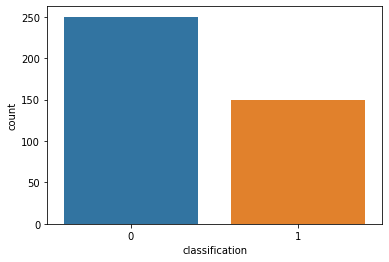

In [228]:
import seaborn as sns

sns.countplot(data1['classification'],label="Count")

# Decision Tree Classification 

In [229]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
dt.fit(x_train,y_train)


import pickle
with open('model', 'wb') as f:
  pickle.dump(dt,f)
y_predict=dt.predict(x_test)
y_predict

array([0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.])

# Evaluation

# Accuracy Score

In [230]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9625

# Confusion Matrix

In [231]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[41,  3],
       [ 0, 36]])

In [232]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN =cm[1, 0]
r=(TP + TN) / float(TP + TN + FP + FN)
r

0.9625

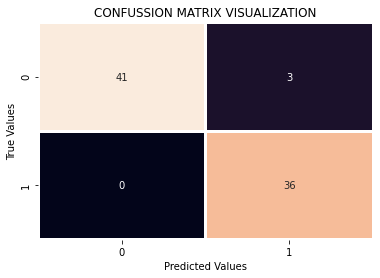

In [233]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

# AOC - ROC curve

In [234]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.9659090909090909

<function matplotlib.pyplot.plot>

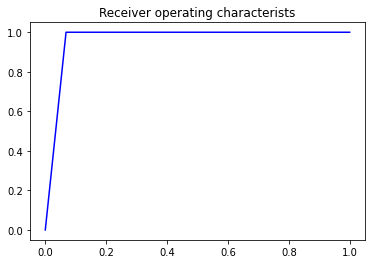

In [235]:
plt.title('Receiver operating characterists')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.plot